In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train=pd.read_csv('./happiness_train_complete.csv',encoding='gbk')
df_test=pd.read_csv('./happiness_test_complete.csv',encoding='gbk')
df_train.info()
df_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 140 entries, id to public_service_9
dtypes: float64(25), int64(111), object(4)
memory usage: 8.5+ MB


,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50
5,6,5,2,18,52,86,2015/7/18 12:09,1,1946,1,...,4,90,90,90,90,90.0,90,80,90,90
6,7,4,1,10,27,49,2015/7/26 14:51,1,1963,1,...,4,80,80,50,70,60.0,50,60,80,80
7,8,4,1,11,31,54,2015/7/19 13:12,1,1959,1,...,4,70,70,70,70,70.0,70,80,70,70
8,9,4,2,28,81,122,2015/8/1 9:25,1,1952,1,...,5,82,70,60,82,84.0,85,86,87,85
9,10,4,2,24,70,110,2015/8/3 19:23,1,1985,1,...,5,60,60,60,60,60.0,60,60,60,60


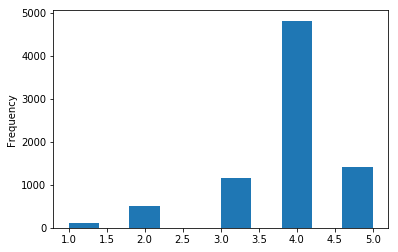

In [2]:
df_train=df_train[df_train['happiness']>0]
df_train['happiness'].plot.hist()
y_train=np.log1p(df_train.pop('happiness'))

In [3]:
#合并数据
df_all=pd.concat((df_train,df_test),axis=0)

In [4]:
total = df_all.isnull().sum().sort_values(ascending=False)
rate = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
miss_data = pd.concat([total,rate], axis=1, keys=['total', 'rate'])
miss_data[miss_data['rate']>0]

,total,rate
edu_other,10950,0.999452
invest_other,10911,0.995893
property_other,10867,0.991877
join_party,9831,0.897317
s_work_type,7437,0.678806
s_work_status,7437,0.678806
work_status,6932,0.632713
work_yr,6932,0.632713
work_manage,6931,0.632621
work_type,6931,0.632621


In [5]:
#填充婚姻
marital_data=df_all[df_all['marital']==1]
df_all['s_work_exper'].fillna(0,inplace=True)
df_all['s_hukou'].fillna(0,inplace=True)
df_all['s_political'].fillna(0,inplace=True) 
df_all['s_birth'].fillna(0,inplace=True)    
df_all['s_edu'].fillna(0,inplace=True)     
df_all['s_income'].fillna(0,inplace=True) 
df_all['s_work_status'].fillna(0,inplace=True) 
df_all['s_work_type'].fillna(0,inplace=True) 

In [6]:
edu_data=df_train[df_train['edu']==1]
edu_data['edu_status']
df_all['edu_status'].fillna(0,inplace=True)
df_all[df_all['edu_yr'].isnull()]

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
5,6,2,18,52,86,2015/7/18 12:09,1,1946,1,1,...,4,90,90.0,90,90,90.0,90,80,90,90
9,10,2,24,70,110,2015/8/3 19:23,1,1985,1,1,...,5,60,60.0,60,60,60.0,60,60,60,60
11,12,2,23,69,109,2015/9/23 19:12,1,1968,1,0,...,5,100,20.0,60,70,60.0,80,62,52,75
13,14,1,4,7,14,2015/10/18 16:03,2,1939,1,1,...,3,80,70.0,70,65,70.0,60,80,80,70
14,15,2,15,41,72,2015/7/15 15:05,2,1935,1,0,...,5,-2,80.0,70,-2,-2.0,-2,80,-2,80
21,22,2,9,21,43,2015/7/5 8:08,2,1948,1,1,...,5,100,100.0,100,100,100.0,100,100,100,100
29,30,2,18,53,87,2015/7/15 15:24,1,1947,1,1,...,5,80,79.0,89,78,80.0,68,80,80,79
34,35,2,9,21,43,2015/7/6 9:44,2,1937,1,0,...,5,70,80.0,80,80,80.0,80,70,80,80
47,48,2,5,8,24,2015/8/6 9:00,2,1955,1,1,...,5,100,100.0,100,90,90.0,80,80,95,100
50,51,1,12,32,56,2015/7/29 17:58,2,1933,1,1,...,4,90,88.0,-2,90,-2.0,90,90,-2,-2


In [7]:
#填充不频繁社交
social_data=df_train[df_train['socialize']==1]
social_data['social_friend']
df_all['social_friend'].fillna(7,inplace=True)
df_all['social_neighbor'].fillna(7,inplace=True)

In [8]:
#没有孩子填充为0
df_all['minor_child'].fillna(0,inplace=True)

In [9]:
#没有户口填充为4
hukou_data=df_train[df_train['hukou_loc'].isnull()]
hukou_data['hukou']
df_all['hukou_loc'].fillna(4,inplace=True)

In [10]:
#工作情况
df_all['work_type'].fillna(0,inplace=True)
df_all['work_status'].fillna(0,inplace=True)
df_all['work_manage'].fillna(0,inplace=True)
df_all[df_all['work_exper']==4|6]['work_yr']
df_all['work_yr'].fillna(0,inplace=True)

In [11]:
#户口情况
df_all['marital_now'].fillna(2015,inplace=True) 
#新增特征值mar_yr
df_all['mar_yr']=2015-df_all['marital_now']

In [12]:
#查看一下测试集的family_income有没有缺失值，发现没有
df_test['family_income'].isnull().value_counts()
#训练集中的family_income只有一条空记录，用平均值填充
df_all['family_income'].fillna(df_all['family_income'].mean(),inplace=True)

In [13]:
df_all.drop( ['edu_other','invest_other','property_other','join_party',
                'edu_yr','marital_1st','s_political',],axis=1,inplace=True)

In [14]:
#验证一下处理结果
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data[missing_data['percent']>0]

,total,percent


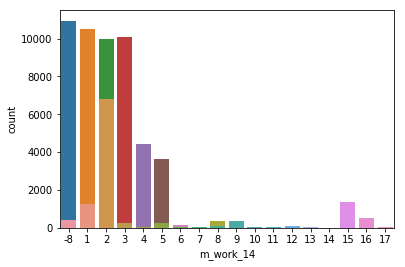

In [15]:
#民族分布不均匀
sns.countplot(x='nationality', data=df_all)
df_all.drop(['nationality'],axis=1,inplace=True)
#宗教不均匀
sns.countplot(x='religion', data=df_all)
sns.countplot(x='religion_freq', data=df_all)
df_all.drop(['religion','religion_freq'],axis=1,inplace=True)
#政治面貌不均匀
sns.countplot(x='political', data=df_all)
df_all.drop(['political'],axis=1,inplace=True)
#房产不均匀，只保留property_1和property_2
sns.countplot(x='property_0', data=df_all)
sns.countplot(x='property_1', data=df_all)
sns.countplot(x='property_2', data=df_all)
sns.countplot(x='property_3', data=df_all)
sns.countplot(x='property_4', data=df_all)
sns.countplot(x='property_5', data=df_all)
sns.countplot(x='property_6', data=df_all)
sns.countplot(x='property_7', data=df_all)
sns.countplot(x='property_8', data=df_all)
df_all.drop(['property_0','property_3','property_4','property_5',
             'property_6','property_7','property_8'],axis=1,inplace=True)
#health_problem和health分布一样，取health
sns.countplot(x='health_problem', data=df_all)
df_all.drop(['health_problem'],axis=1,inplace=True)
#media_1，2，3分布一样，只保留media_1
sns.countplot(x='media_1', data=df_all)
sns.countplot(x='media_2', data=df_all)
sns.countplot(x='media_3', data=df_all)
sns.countplot(x='media_4', data=df_all)
sns.countplot(x='media_5', data=df_all)
sns.countplot(x='media_6', data=df_all)
sns.countplot(x='media_2', data=df_all)
df_all.drop(['media_2','media_3'],axis=1,inplace=True)

#新增一个变量class_var=df_all['class_10_after']-df_all['class_10_before']
sns.countplot(x='class', data=df_all)
sns.countplot(x='class_10_before', data=df_all)
sns.countplot(x='class_10_after', data=df_all)
df_all['class_var']=df_all['class_10_after']-df_all['class_10_before']


#社保里面商业保险只保留一个，删除insur_3,4
sns.countplot(x='insur_1', data=df_all)
sns.countplot(x='insur_2', data=df_all)
sns.countplot(x='insur_3', data=df_all)
sns.countplot(x='insur_4', data=df_all)
df_all.drop(['insur_3','insur_4'],axis=1,inplace=True)
#基本没人投资，全部删除
sns.countplot(x='invest_0', data=df_all)
sns.countplot(x='invest_1', data=df_all)
sns.countplot(x='invest_2', data=df_all)
sns.countplot(x='invest_3', data=df_all)
sns.countplot(x='invest_4', data=df_all)
sns.countplot(x='invest_5', data=df_all)
df_all.drop(['invest_0','invest_1','invest_2','invest_3','invest_4',
             'invest_5'],axis=1,inplace=True)

#删除父母亲的政治面貌
sns.countplot(x='f_political', data=df_all)
sns.countplot(x='f_work_14', data=df_all)
sns.countplot(x='m_political', data=df_all)
sns.countplot(x='m_work_14', data=df_all)
df_all.drop(['f_political','m_political'],axis=1,inplace=True)

In [16]:
#转换时间格式,求出每个人的年龄
df_all['age']=pd.to_datetime(df_all['survey_time']).dt.year-df_all['birth']
df_all.drop(['survey_time','birth'],axis=1,inplace=True)
#删除其他时间数据
df_all.drop(['s_birth','f_birth','m_birth'],axis=1,inplace=True)
df_all.drop(['marital_now'],axis=1,inplace=True)

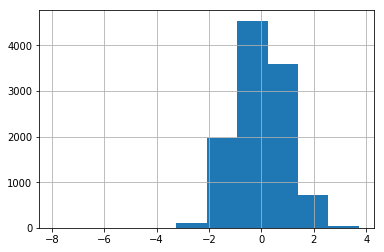

In [17]:
numeric_cols=['income','height_cm','weight_jin','s_income',
              'family_income','family_m','house','car'
              ,'son','daughter','minor_child','inc_exp','public_service_1',
              'public_service_2','public_service_3','public_service_4',
              'public_service_5','public_service_6','public_service_7',
              'public_service_8','public_service_9','floor_area']
numeric_cols_means=df_all.loc[:,numeric_cols].mean()
numeric_cols_std=df_all.loc[:,numeric_cols].std()
df_numeric=(df_all.loc[:,numeric_cols]-numeric_cols_means)/numeric_cols_std
df_numeric.iloc[:,1].hist()


In [18]:
#对类别类型的特征值转换为Object
df_object=df_all.drop(numeric_cols,axis=1)
df_object=df_object.astype(str)
for cols in list(df_object.iloc[:,1:].columns):
    df_object=pd.get_dummies(df_object.iloc[:,1:],prefix=cols)

In [19]:
#合并数据 
data=pd.concat((df_object,df_numeric),axis=1)

In [20]:
train_data=data.iloc[:7988,:]
test_data=data.iloc[7988:,:]
X_train=train_data.values
X_test=test_data.values

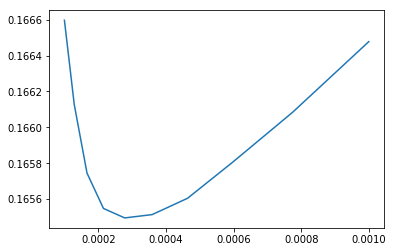

In [21]:
#Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
alpha_param={'alpha':list(np.logspace(-4,-3,10))}
kf = KFold(n_splits=5, random_state=42,shuffle=True)
grid_Lasso=GridSearchCV(Lasso(),param_grid=alpha_param,
                    cv=kf,scoring='neg_mean_squared_error')
grid_Lasso.fit(X_train,y_train)

grid_Lasso.cv_results_['mean_test_score']
Lasso_alpha=pd.DataFrame({'alpha':list(np.logspace(-4,-3,10)),'score':list(grid_Lasso.cv_results_['mean_test_score'])})
Lasso_alpha['score']=np.sqrt(-Lasso_alpha['score'])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(Lasso_alpha['alpha'],Lasso_alpha['score'])
grid_Lasso.best_params_
#{'alpha': 0.0002782559402207126}
RMSE=np.sqrt(-grid_Lasso.best_score_)
#0.16547029307931724
best_Lasso=grid_Lasso.best_estimator_
predict_Lasso=best_Lasso.predict(X_test)

In [22]:
#xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42,shuffle=True)
parameters ={'max_depth':[4,5,6],'min_child_weight':list(range(1,6,2))}
xgb1=xgb.XGBRegressor(learning_rate=0.1, n_estimators=500,
                  silent=0, objective='reg:linear',
                  gamma=0,subsample=0.8,colsample_bytree=0.8,
                  nthread=4,scale_pos_weight=1,seed=27)
grid_xgb=GridSearchCV(estimator=xgb1,param_grid=parameters,cv=kf,scoring='neg_mean_squared_error')
grid_xgb.fit(X_train,y_train)
grid_xgb.best_params_
#{'max_depth': 4, 'min_child_weight': 1}
RMSE=np.sqrt(-grid_xgb.best_score_)
#0.1652553857634199
#利用最佳模型来进行预测
best_xgb=grid_xgb.best_estimator_
predict_xgb=best_xgb.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'